#Week 5

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import cv2
import scipy.ndimage as ndi

import random

## Hough transform demo
http://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html

http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm

https://en.wikipedia.org/wiki/Canny_edge_detector

http://docs.opencv.org/master/da/d22/tutorial_py_canny.html#gsc.tab=0

http://docs.opencv.org/master/d6/d10/tutorial_py_houghlines.html#gsc.tab=0

http://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html


http://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

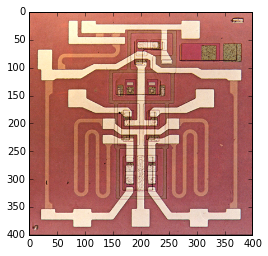

In [2]:
# read in the image
img = cv2.imread('images/1964_3_2.jpg')
imgplt = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

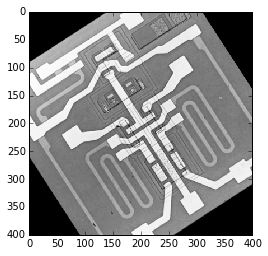

In [3]:
# gray scale image
#img = cv2.imread('images/1964_3_2.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# rotate
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),33,1)
img = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

imgplt = plt.imshow(img, cmap=cm.Greys_r, vmin=0, vmax=255, interpolation="nearest")

###Canny edge detection

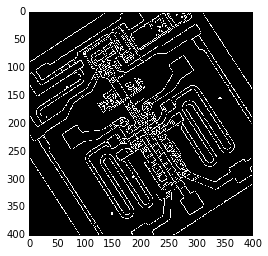

In [4]:
# detect edges using Canny algorithm
edges = cv2.Canny(img, 100, 250)
imgplt = plt.imshow(edges, cmap=cm.Greys_r, vmin=0, vmax=255, interpolation="nearest")

###Hough transform

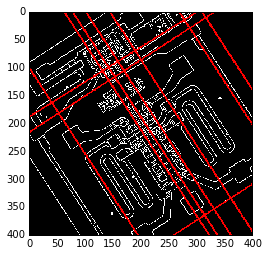

In [5]:
lines = cv2.HoughLines(edges, rho=1,theta=np.pi/180,threshold=10)
edges_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

n_lines = 10
for line in lines[:n_lines]:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(edges_lines,(x1,y1),(x2,y2),(255,0,0),2)
imgplt = plt.imshow(edges_lines, cmap=cm.Greys_r, vmin=0, vmax=255, interpolation="nearest")

###Probabilistic Hough transform

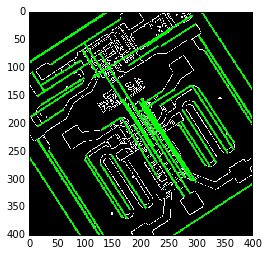

In [6]:
lines = cv2.HoughLinesP(edges, rho=1,theta=np.pi/180,threshold=100,minLineLength=30,maxLineGap=10)
edges_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
#edges_lines = np.zeros_like(edges_lines)

n_lines = 150
for line in lines[:n_lines]:
    x1,y1,x2,y2 = line[0]
    cv2.line(edges_lines,(x1,y1),(x2,y2),(0,255,0),2)
    
imgplt = plt.imshow(edges_lines, cmap=cm.Greys_r, vmin=0, vmax=255, interpolation="nearest")

##LSD: a Line Segment Detector
http://www.ipol.im/pub/art/2012/gjmr-lsd/

##Otsu's segmentation
http://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0

http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#threshold

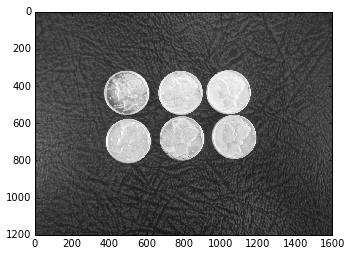

In [7]:
img = cv2.imread('images/coins.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('images/1964_3_2.jpg', cv2.IMREAD_GRAYSCALE)

# apply median filter de-noise
img = cv2.medianBlur(img, 5)

imgplt = plt.imshow(img, cmap=cm.Greys_r, vmin=0, vmax=255, interpolation="nearest")

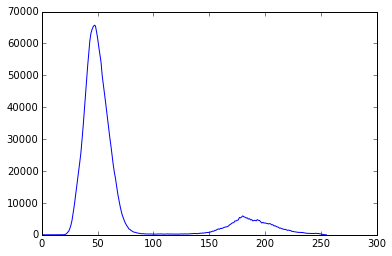

In [8]:
# histogram
hist, bins = np.histogram(img, bins=256, range=(0, 256))
imgplt = plt.plot(bins[:-1], hist)

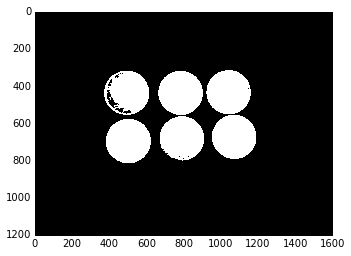

In [9]:
# Otsu's thresholding
t,img_bw = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imgplt = plt.imshow(img_bw, cmap=cm.Greys_r, vmin=0, vmax=255, interpolation="nearest")

##Active Countours
Chan-Vese
http://www.ipol.im/pub/art/2012/g-cv/

##Q. 10 (Optional programming exercises)

###Implement the Hough transform to detect circles.

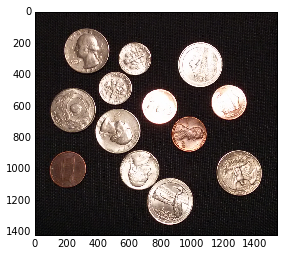

In [10]:
# use coins
file_in = 'images/coins4.jpg'
file_out = file_in.replace('.jpg', '_counted.jpg')

img_color = cv2.imread(file_in)
imgplt = plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

#imgplt = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#img = cv2.imread(file_in, cv2.IMREAD_GRAYSCALE)
#imgplt = plt.imshow(img, cmap=cm.Greys_r, interpolation="nearest")

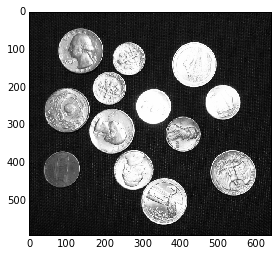

In [11]:
# convert to gray scale, reduce image dimensions
img_scaling = 640./img_color.shape[1]
img = cv2.resize(cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY), dsize=(0,0), fx=img_scaling, fy=img_scaling)

imgplt = plt.imshow(img, cmap=cm.Greys_r, interpolation="nearest")

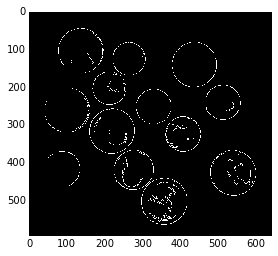

In [12]:
# detect edges
edges = cv2.Canny(img, 300, 850)
imgplt = plt.imshow(edges, cmap=cm.Greys_r, interpolation="nearest")

In [13]:
import random

# extract indices of pixels on the edges
edge_pxls = zip(*np.where(edges==255))

# randomy pick n edge pixels using shuffle
n = 5000
random.shuffle(edge_pxls)
edge_pxls = edge_pxls[:n]

####Radius search accumulator

In [14]:
# radius search 
radii = range(30, 65, 1) # search space limited to 'known' range
radii_hist = () # count of circle intersections for each radius
circle_images = () # circle images for each radius

for r in radii:
    circles = np.zeros_like(img).astype(np.int)
    # acuumulate
    for y, x in edge_pxls:
        circles += cv2.circle(img=np.zeros_like(img).astype(np.int), center=(x,y), radius=r, color=1, lineType=cv2.LINE_4)
    radii_hist += (np.max(circles),)
    circle_images += (circles,)

# conver to numpy arrays
radii_hist = np.array(radii_hist)
radii = np.array(radii)

####Within radius search space, find the 4 peaks that represent the readii of the 4 US denominations

In [15]:
#from scipy.ndimage.filters import convolve1d
#from scipy.signal import find_peaks_cwt

# my own peak detector
def my_find_peaks(x):
    peaks = []
    for i in range(len(x) - 2):
        is_peak = False
        if i < len(x) - 3 and x[i+1] == x[i+2]:
            is_peak = x[i] < x[i+1] > x[i+3]
        else:
            is_peak = x[i] < x[i+1] > x[i+2]    
        if is_peak:
            peaks.append(i+1)
    return peaks

# run peak detection
#peaks = find_peaks_cwt(radii_hist, np.arange(1,5))
peaks = my_find_peaks(radii_hist)

# get the indices of 4 most common radii
peak_idxs = sorted([y for y in sorted(peaks, key=lambda p : radii_hist[p])][-4:])

# get the 4 most common radii
radii_reduced = radii[peak_idxs]
circle_images_reduced = np.array(circle_images)[peak_idxs]

print 'Coin radii (in pixels):', radii_reduced

Coin radii (in pixels): [44 47 52 61]


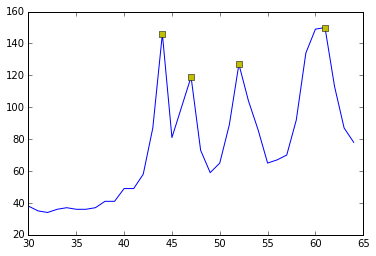

In [22]:
# plot the coin radii histogram
imgplt = plt.plot(radii, radii_hist , radii_reduced, radii_hist[peak_idxs], 'ys')

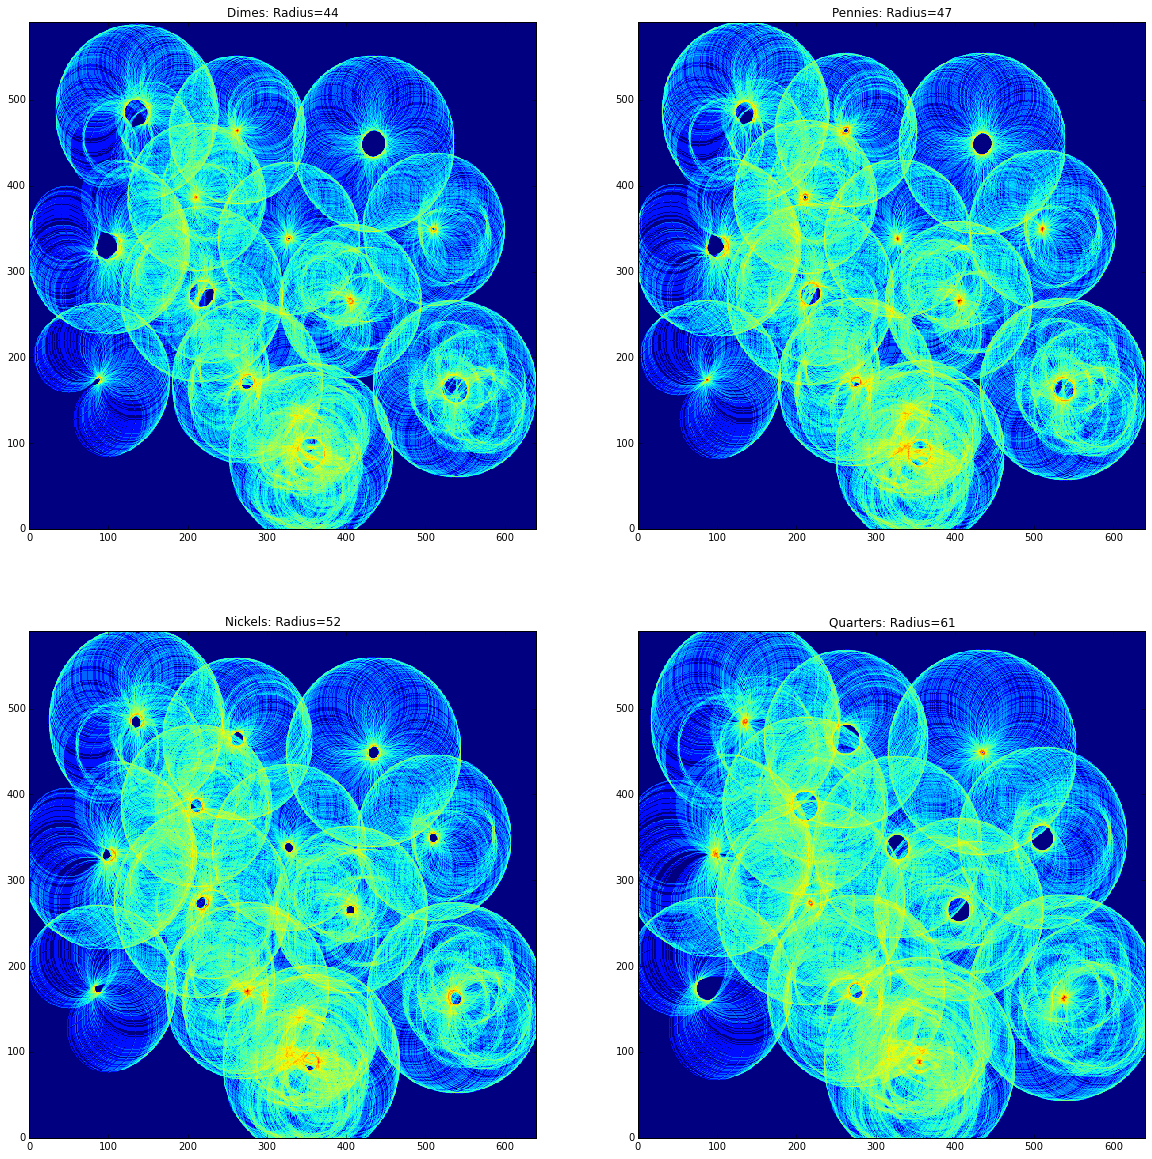

In [23]:
COIN_MAP = ('Dimes', 'Pennies', 'Nickels', 'Quarters')
VALUE_MAP = (10, 1, 5, 25)

# plot all
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20, 20)

for r in range(4):
    j = r % 2
    i = r // 2
    ax[i,j].set_title(COIN_MAP[r] + ': Radius='+ str(radii_reduced[r]))
    circle_image = np.copy(circle_images_reduced[r][::-1,:])
    
    #circle_image -= (np.mean(circle_image) + 4*np.std(circle_image)) # n sigma
    #circle_image = np.where(circle_image >= 0, circle_image, np.zeros_like(circle_image) )
    circle_image = np.log(circle_image + 1)
    
    ax[i,j].pcolor(circle_image)
    ax[i,j].axis([0, img.shape[1], 0, img.shape[0]])
    #ax[i,j].imshow(np.log(circle_images_reduced[r]+1), cmap=cm.Greys_r, vmin=0, interpolation="nearest")

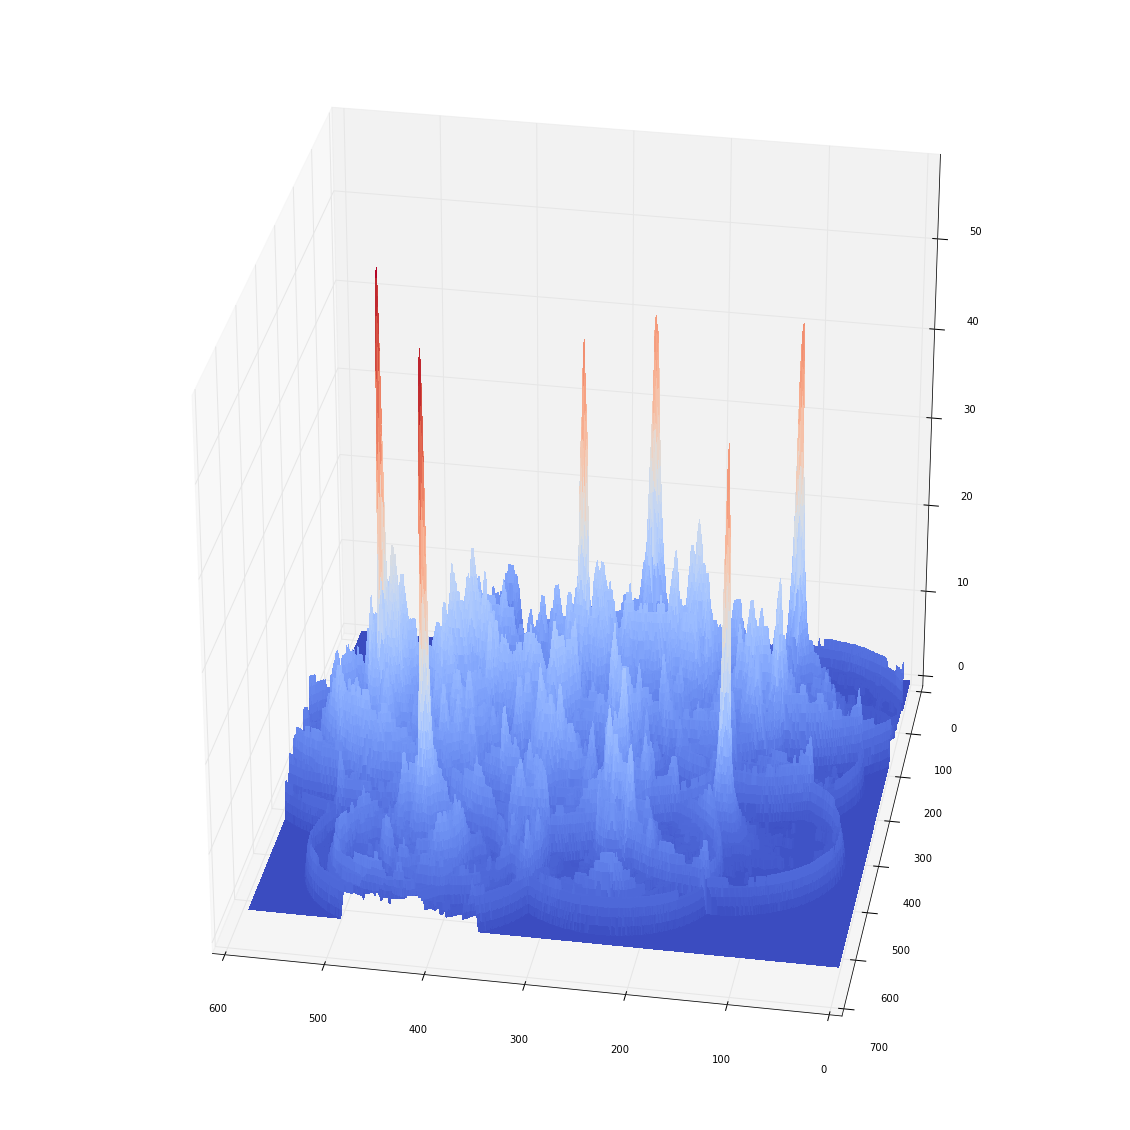

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# plot all
fig = plt.figure()
#fig, ax = plt.subplots(2,2)
#fig.set_size_inches(40, 40)
fig.set_size_inches(20, 20)
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))

r = 3

#circle_image = np.copy(circle_images_reduced[r][::-1,:])
circle_image = np.copy(circle_images_reduced[r][::,:])
k = 5
kernel = np.ones((k,k))/(k*k)
circle_image = ndi.convolve(circle_image, kernel)
#circle_image = np.log(circle_image + 1)

surf = ax.plot_surface(Y, X, circle_image[Y,X], rstride=1, cstride=1, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False)

ax.set_zlim(np.min(circle_image), np.max(circle_image))
ax.view_init(30, 100)


    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    #fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

####2-D Peak detection
__It's a mess for now - Do not re-use!__

In [26]:
#imgplt = plt.plot(range(circle_images2[3].shape[1]), circle_images2[3][115,:])

def my_find_peaks_2d(x):
    mean = np.mean(x)
    sigma = np.std(x)
    th = mean + 15*sigma
    x_clip = np.where(x > th, x, np.zeros_like(x))

    peaks = []
    for i in range(x.shape[0] - 3):
        for j in range(x.shape[1] - 3):
            top = np.zeros((1, 4)) if i == 0 else x_clip[i-1,j:j+4]
            region = x_clip[i:i+4,j:j+4]
            is_peak = False
            if region[1,1] == region [2,1]:
                is_peak = region[0,1] < region[1,1] > region[3,1]
            else:
                is_peak = region[0,1] < region[1,1] > region[2,1]
            if is_peak:    
                is_peak = False
                if region[1,1] == region [1,2]:
                    is_peak = region[1,0] < region[1,1] > region[1,3]
                else:
                    is_peak = region[1,0] < region[1,1] > region[1,2]   
                if is_peak:    
                    is_peak = False
                    if region[1,1] == region [2,2]:
                        is_peak = region[0,0] < region[1,1] > region[3,3]
                    else:
                        is_peak = region[0,0] < region[1,1] > region[2,2]
                    if is_peak:
                        is_peak = False
                        if region[1,1] == region [0,2]:
                            is_peak = region[2,0] < region[1,1] > top[3]
                        else:
                            is_peak = region[2,0] < region[1,1] > region[0,2]                  
            #print is_peak, region, np.max(region), np.min(region)

            if is_peak:
                print 'Peak at ', [i+1, j+1], 'N=', x[i+1, j+1], 'th=', th
                peaks.append([i+1, j+1])
    return peaks

####Print final image with detected coins 

Coin radius = 44
Peak at  [125, 263] N= 113 th= 60.5298076748
Peak at  [203, 211] N= 146 th= 60.5298076748
Coin radius = 47
Peak at  [240, 511] N= 82 th= 62.6382691122
Peak at  [252, 328] N= 96 th= 62.6382691122
Peak at  [324, 405] N= 119 th= 62.6382691122
Peak at  [416, 88] N= 90 th= 62.6382691122
Coin radius = 52
Peak at  [419, 275] N= 127 th= 65.8512168598
Coin radius = 61
Peak at  [140, 433] N= 91 th= 72.7530442653
Peak at  [142, 437] N= 76 th= 72.7530442653
Peak at  [259, 99] N= 75 th= 72.7530442653
Peak at  [315, 217] N= 82 th= 72.7530442653
Peak at  [318, 219] N= 78 th= 72.7530442653
Peak at  [426, 538] N= 113 th= 72.7530442653
Peak at  [428, 537] N= 101 th= 72.7530442653
Peak at  [501, 356] N= 150 th= 72.7530442653
[2, 4, 1, 8]


True

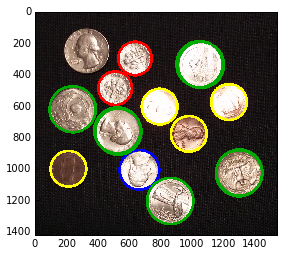

In [27]:
img_final = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

colors = ((255,0,0),  (255,255,0), (0,0,255),  (0,170,0))

amount = [0,0,0,0]
for r in range(4):
    radius = np.round(radii_reduced[r]/img_scaling, 0).astype(np.int)
    print 'Coin radius =', radii_reduced[r]
    coin_centers = my_find_peaks_2d(circle_images_reduced[r])
    amount[r] = len(coin_centers)
    for c in coin_centers:
        center = tuple(np.round(np.array(c[::-1])/img_scaling, 0).astype(np.int))
        #print center
        cv2.circle(img_final, center=center, radius=radius, color=colors[r], thickness=16)

print amount
    
imgplt = plt.imshow(img_final, interpolation="nearest")
cv2.imwrite(file_out, cv2.cvtColor(img_final, cv2.COLOR_RGB2BGR))

###Implement the Hough transform to detect ellipses.

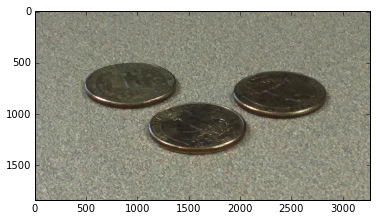

In [28]:
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.draw import line
from skimage.feature import peak_local_max

# use coins
file_in = 'images/coins_ellipse.jpg'
file_out = file_in.replace('.jpg', '_detected.jpg')

img_color = cv2.imread(file_in)
imgplt = plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

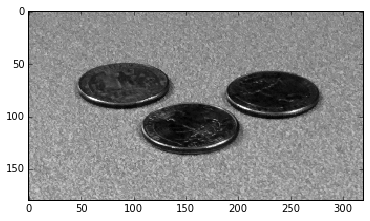

In [29]:
# convert to gray scale, reduce image dimensions
img_scaling = 320./img_color.shape[1]
img = cv2.resize(cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY), dsize=(0,0), fx=img_scaling, fy=img_scaling)

#k = 3
#kernel = np.ones((k,k))/(k*k)
#img = ndi.convolve(img, kernel)

imgplt = plt.imshow(img, cmap=cm.Greys_r, interpolation="nearest")

http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny

####Find edges

In [54]:
# find edges
edges = np.zeros_like(img)
edges[np.where(canny(img, sigma=3.0, low_threshold=20, high_threshold=40))] = 1

#imgplt = plt.imshow(edges, cmap=cm.Greys_r, interpolation="nearest")

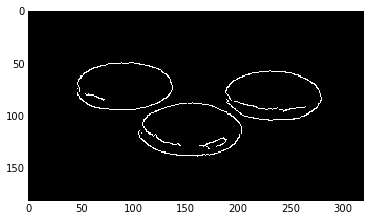

In [55]:
one_ellipse = edges.copy()
two_ellipse = edges.copy()
x = np.arange(one_ellipse.shape[1])
y = np.round(-0.5 * x + 150, 0).astype(np.int)
for i in x:
#    for j in range(y[i], one_ellipse.shape[0]):
#        one_ellipse[j, i] = 0
    for j in range(one_ellipse.shape[0]):
        if j > y[i]:
            one_ellipse[j, i] = 0
        else:
            two_ellipse[j, i] = 0

my_ellipse= one_ellipse
my_ellipse= two_ellipse
my_ellipse= edges

imgplt = plt.imshow(my_ellipse, cmap=cm.Greys_r, interpolation="nearest")

####scikit-image hough transform (not working)
http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.hough_ellipse

In [38]:
# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
#result = hough_ellipse(edges, accuracy=50, threshold=250,  min_size=100, max_size=120)

# not working?
if False:
    result = hough_ellipse(two_ellipse, accuracy=1, threshold=25, min_size = 10, max_size = 60)

    result.sort(order='accumulator')
    best = list(result[:-4:-1])
    print best
    copy = two_ellipse.copy()
    for r in best:
        print r
        #cv2.ellipse(copy, center=(r[1], r[0]), axes=(22, 22) ,angle=0, startAngle=0, endAngle=360,color=(255,255,0),thickness=32)
    imgplt = plt.imshow(copy, cmap=cm.Greys_r, interpolation="nearest")


http://scikit-image.org/docs/dev/api/skimage.draw.html#skimage.draw.ellipse_perimeter

####Initialize (narrow) search range for Hough transform

In [39]:
#cheat:
x0 = 91
y0 = 71
a = 45
b = 22
th = -1 * np.pi/180

#i = np.zeros_like(img)
#i = my_ellipse.copy()
#col, row = ellipse_perimeter(cy=y0, cx=x0, yradius=b, xradius=a, orientation=th)
#i[col, row] = 2
#imgplt = plt.imshow(i, cmap=cm.Greys_r, interpolation="nearest")

####Perform Hough transform. Search space is a, b, th.

In [40]:
# using cheat for search ranges for a, b th
n_steps = 8
inc_steps = n_steps//4
a_range = np.arange(a - n_steps, a + n_steps + 1, inc_steps)
b_range = np.arange(b - n_steps, b + n_steps + 1, inc_steps)
deg = np.pi/180
th_range = np.arange(th - n_steps*deg, th + (n_steps + 1)*deg, inc_steps * deg)

# pick some random pixels
ellipse_pxls = zip(*np.where(my_ellipse == 1))
random.shuffle(ellipse_pxls)

# initilalize accumulator
peak_acc = np.zeros((a_range.size, b_range.size, th_range.size), dtype=np.int)

a_en = tuple(enumerate(a_range))
b_en = tuple(enumerate(b_range))
th_en = tuple(enumerate(th_range))

i_zeros = np.zeros_like(img).astype(np.int)

# iterate over search space for a, b ,th 
for a_i, a_s in a_en:
    for b_i, b_s in b_en:
        if b_s > a_s: # let's keep a < b
            break
        for th_i, th_s in th_en:
            i = i_zeros.copy()
            for y, x in ellipse_pxls:
                // accumulate ellipses
                col, row = ellipse_perimeter(cy=y, cx=x, yradius=b_s, xradius=a_s, orientation=th_s, shape=i.shape)
                i[col, row] = i[col, row] + 1
            peak_acc[a_i, b_i, th_i] = np.max(i)

####Find the maximum in the search space. This will give the estimated a, b, th

Estimated a= 45
Estimated b= 22
Estimated th= -0.0174532925199


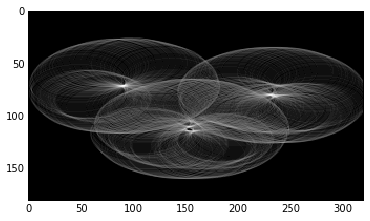

In [58]:
#print np.max(peak_acc)
peaks = np.where(peak_acc == np.max(peak_acc))
a_f = a_range[peaks[0][0]]
b_f = b_range[peaks[1][0]]
th_f = th_range[peaks[2][0]]
print 'Estimated a=', a_f
print 'Estimated b=', b_f
print 'Estimated th=', th_f

i = np.zeros_like(img).astype(np.int)
for y, x in ellipse_pxls:
    col, row = ellipse_perimeter(cy=y, cx=x, yradius=b_f, xradius=a_f, orientation=th_f, shape=i.shape)
    i[col, row] +=  1
    
imgplt = plt.imshow(np.square(np.log(i+1)), cmap=cm.Greys_r, interpolation="nearest")
#imgplt = plt.imshow(i, cmap=cm.Greys_r, interpolation="nearest")

####The position of maxima in the image indicates posible ellipse centers 

In [63]:
j = i.copy()

# add some smoothing
k = 3
kernel = np.ones((k,k))/(k*k)
#j = cv2.filter2D(src=j.astype(np.float), ddepth=-1, kernel=kernel)
j = ndi.convolve(j, kernel)

# set a threshold for peaks above which points are considered ellipse centers
peak_threshold = np.mean(j) + 6*np.std(j)
peaks = [c for c in peak_local_max(j, min_distance=5) if j[c[0], c[1]] > peak_threshold]
#peaks.sort(key=lambda p: p[0], reverse=True)

Show some results

Peak threshold= 29.3313283668
Estimated ellipse center= [72 90]
Estimated ellipse center= [ 80 232]
Estimated ellipse center= [110 153]


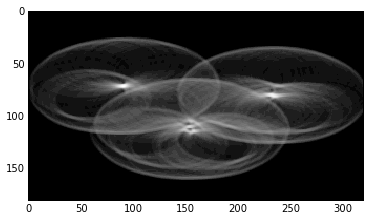

In [64]:
imgplt = plt.imshow(np.square(np.log(j+1)), cmap=cm.Greys_r, interpolation="nearest")
#imgplt = plt.imshow(j, cmap=cm.Greys_r, interpolation="nearest")

print "Peak threshold=", peak_threshold
for p in peaks:
    print "Estimated ellipse center=", p

####Nicer view of search space and peaks

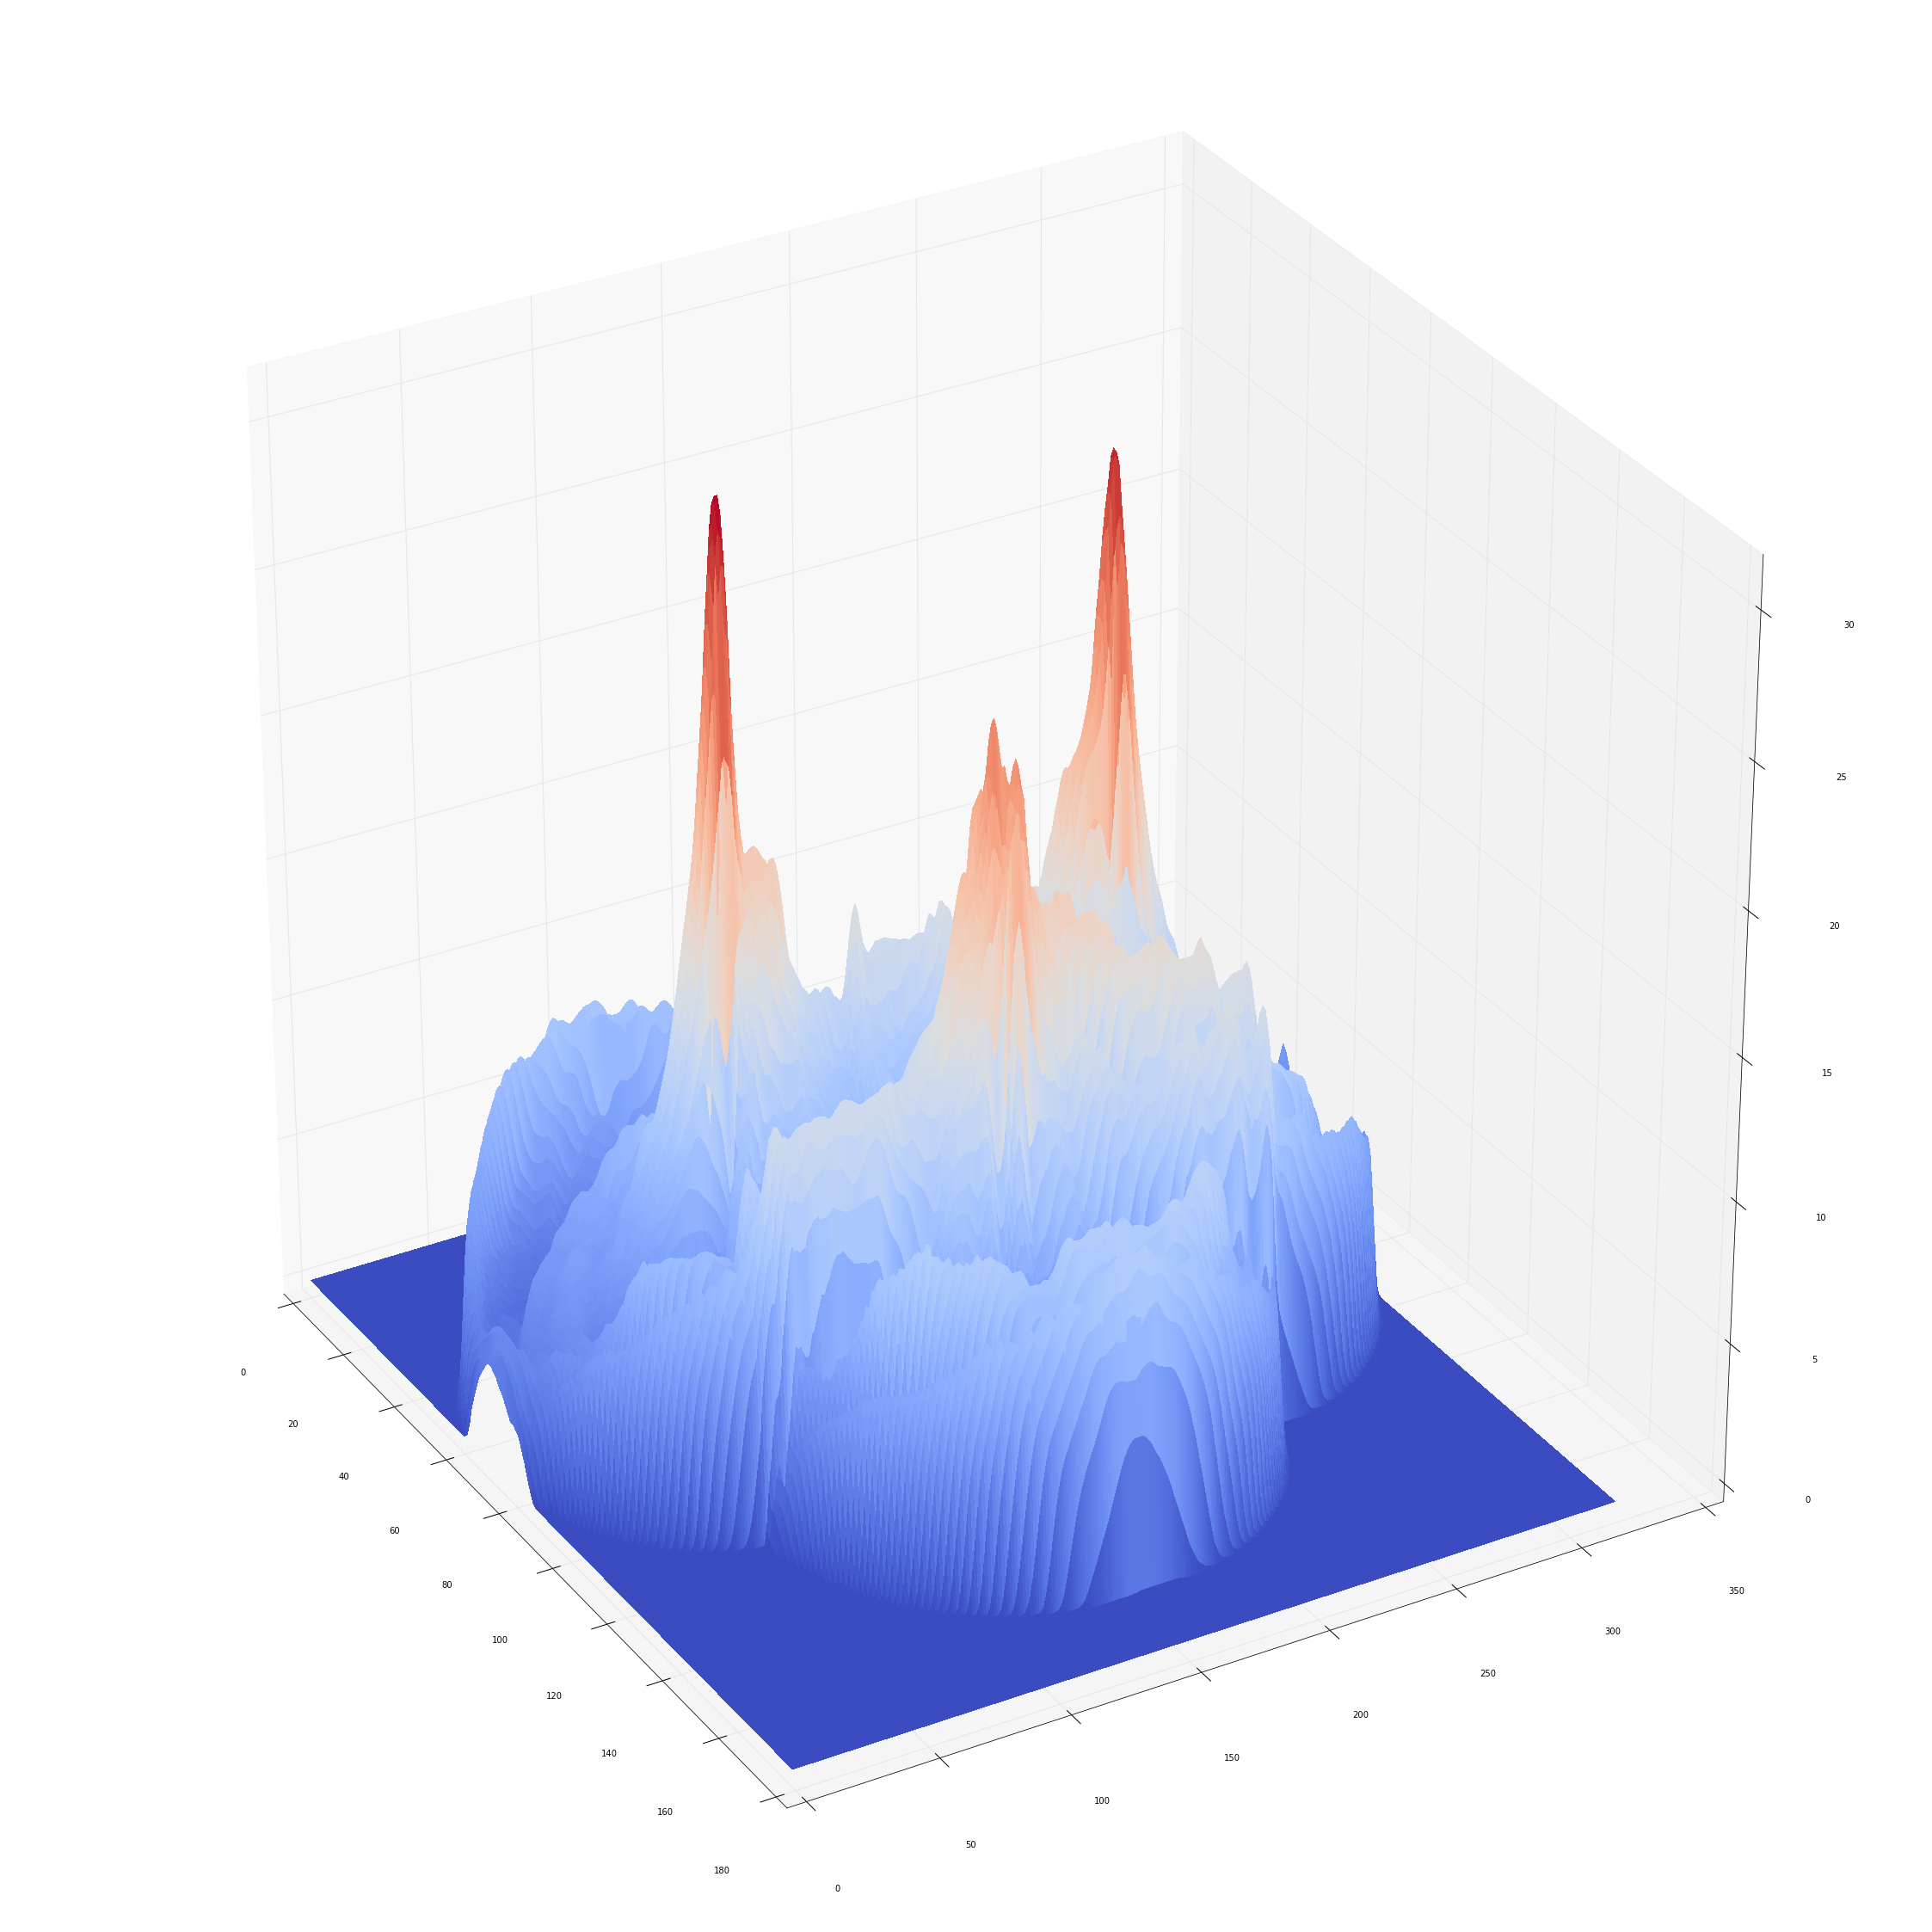

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
fig.set_size_inches(40, 40)
ax = fig.gca(projection='3d')

j = i.copy()
j = j.astype(np.float)

k = 5
j = cv2.filter2D(src=j, ddepth=-1, kernel=np.ones((k,k))/(k*k))
# logarithmics scale stretchW
j = np.log2(j+1)
j = np.square(j)

X, Y = np.meshgrid(np.arange(j.shape[1]), np.arange(j.shape[0]))

surf = ax.plot_surface(Y, X, j, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(j))
ax.view_init(30, 45 +270 + 15)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

####Display found coins

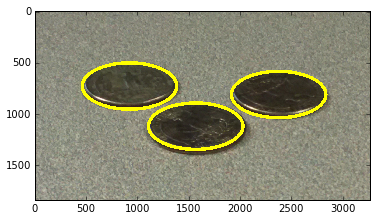

In [73]:
# retrieve original color image
e = np.zeros_like(img_color)
e = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB).copy()

for pk in peaks:
    # apply scaling to ellipse parameters
    # grayscale image was a scaled down version of the original
    p = np.round(pk/img_scaling,0).astype(np.int)
    a = np.round(a_f/img_scaling,0).astype(np.int)
    b = np.round(b_f/img_scaling,0).astype(np.int)
    
    # draw the ellipse in the original image
    cv2.ellipse(e, center=(p[1], p[0]), axes=(a, b) ,angle=0, startAngle=0, endAngle=360,color=(255,255,0),thickness=32)

imgplt = plt.imshow(e, interpolation="nearest")

In [75]:
cv2.imwrite(file_out, cv2.cvtColor(e, cv2.COLOR_RGB2BGR))

True

###Implement the Hough transform to detect straight lines and circles in the same image.

###Consider an image with 2 objects and a total of 3 pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

###Implement a region growing technique for image segmentation. The basic idea is to start from a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.

###Implement region growing from multiple seeds and with a functional like Mumford-Shah. In other words, start from multiple points (e.g., 5) randomly located in the image. Grow the regions, considering a penalty that takes into account average gray value of the region as it grows (and error it produces) as well as the new length of the region as it grows. Consider growing always from the region that is most convenient.